In [2]:
%matplotlib notebook
%pylab
%matplotlib inline

import pandas as pd
import glob

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
def read_gauge_data(gauge_file):
    """
    Read gauge data from a guage file.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(2,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    levels = data1[:,0]
    time = data1[:,1]
    h = data1[:,2]
    hu = data1[:,3]
    hv = data1[:,4]
    eta = data1[:,5]

    u = zeros(len(hu))
    v = zeros(len(hv))
    for i in range(len(hu)):
        if h[i] == 0:
            u[i] = 0
        else:
            u[i] = hu[i]/h[i]
            v[i] = hv[i]/h[i]

    return time, h,eta,sqrt(u**2 + v**2)


def read_valid(gauge_file):
    """
    Read gauge data from a literature data.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(1,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    guage = data1[:,0]
    z = data1[:,1]
    h_max = data1[:,2]
    eta_max = data1[:,3]

    return h_max, eta_max

In [4]:
time,h,eta, u = read_gauge_data("gauge00000.txt")
# print time, h, eta, topo
print('time =  ', time/3600)
print('h = ', h)
print('eta = ', eta)
# print('topo = ', topo)

time =   [0.         0.02777778 0.05555556 0.08333333 0.11111111 0.13888889
 0.16666667 0.19444444 0.22222222 0.25       0.27777778 0.30555556
 0.33333333 0.36111111 0.38888889 0.41666667 0.44444444 0.47222222
 0.5       ]
h =  [0.         0.         0.         0.         0.         0.
 0.0146228  0.11653669 0.16122327 0.19715719 0.2256784  0.25010164
 0.27237408 0.29222846 0.31143463 0.32832462 0.34539607 0.36097193
 0.37536058]
eta =  [0.         0.         0.         0.         0.         0.
 0.0146228  0.11653669 0.16122327 0.19715719 0.2256784  0.25010164
 0.27237408 0.29222846 0.31143463 0.32832462 0.34539607 0.36097193
 0.37536058]


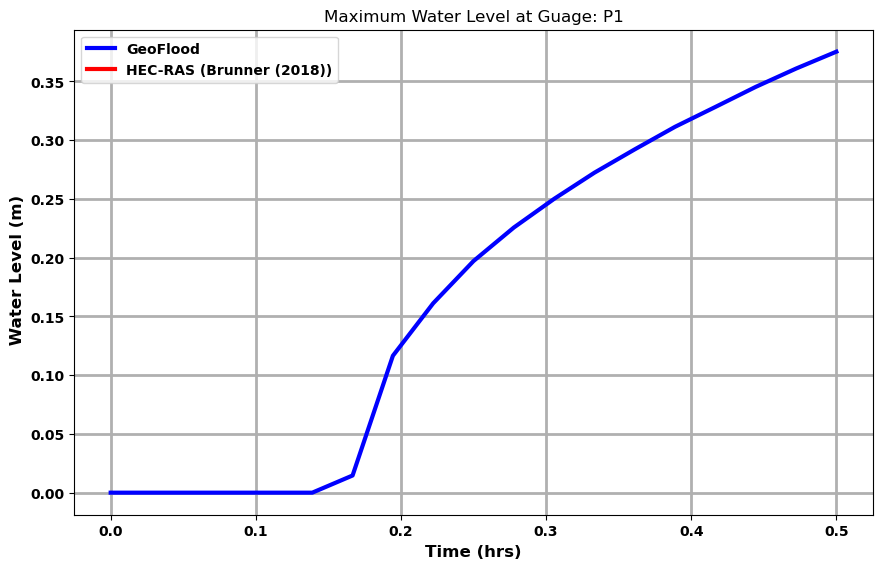

In [5]:
time,h,eta, u = read_gauge_data("gauge00000.txt")
# time,h,eta, topo = read_gauge_data("results/gauge00000.txt")

# plot the data
figsize(10.30, 6.30)
# figure(figsize=(13.22, 8.90), dpi=300)
# rcParams['font.family'] = 'Arial'
figure(5)
plot(time/3600,eta,'b-',label='GeoFlood',linewidth=3)
# plot (time/3600,[10.35]*len(h),'g--',label='GeoClaw',linewidth=3)
# plot (time/3600,[10.25]*len(h),'k--',label='Valid',linewidth=3)
# plot(geoclaw_maxeta,'r-o',label='GeoClaw')

# axis([0, 400,0.0, 0.6])

# line = Line2D([0], [0], label='HEC-RAS', color='r', linewidth=3)
ylabel(' Water Level (m)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
xlabel('Time (hrs)', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# legend(handles=handles, prop={'size': 10, 'weight': 'bold'},frameon=False)
colors = ['blue', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['GeoFlood','HEC-RAS (Brunner (2018))']
legend(lines, labels,prop={'size': 10, 'weight': 'bold'})
#  show a legend without plotting anything

# time_n = arange(0,300,50)
# pstr = ([f'{N:d}' for N in time_n])
# xticks(time_n,pstr)
# #  show the last point on the x axis
# y_n = arange(0.0,0.6,0.1)
# pstr = ([f'{N:.2f}' for N in y_n])
# yticks(y_n,pstr)

rcParams['axes.labelweight'] = 'bold'
xticks(fontweight='bold')
yticks(fontweight='bold')
title('Maximum Water Level at Guage: P1')
grid(linewidth=2)
show()

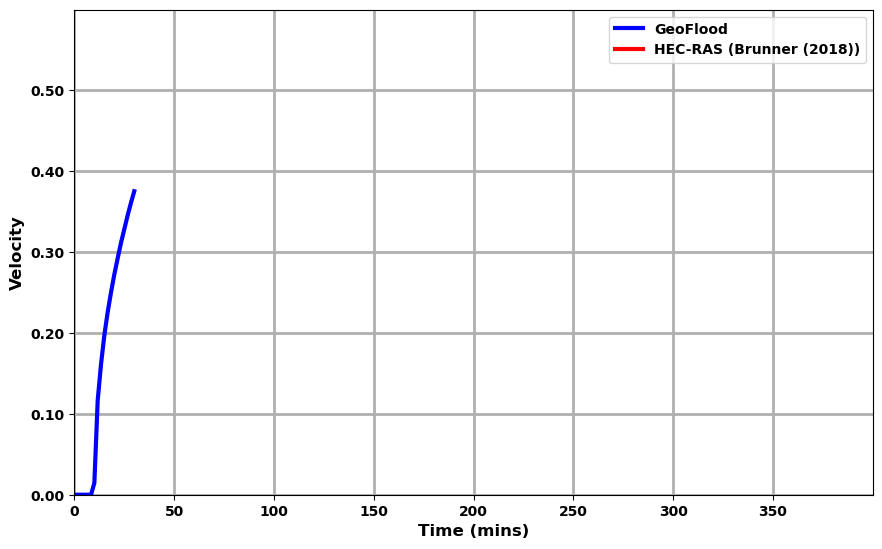

In [6]:
time,h,eta, u = read_gauge_data("gauge00000.txt")
# time,h,eta, topo = read_gauge_data("results/gauge00000.txt")

# plot the data
figsize(10.30, 6.30)
# figure(figsize=(13.22, 8.90), dpi=300)
# rcParams['font.family'] = 'Arial'
figure(5)
plot(time/60,eta,'b-',label='GeoFlood',linewidth=3)
# plot (time/3600,[10.35]*len(h),'g--',label='GeoClaw',linewidth=3)
# plot (time/3600,[10.25]*len(h),'k--',label='Valid',linewidth=3)
# plot(geoclaw_maxeta,'r-o',label='GeoClaw')

axis([0, 400,0.0, 0.6])

# line = Line2D([0], [0], label='HEC-RAS', color='r', linewidth=3)
ylabel('Velocity', fontdict={'fontsize': 12, 'fontweight': 'bold'})
xlabel('Time (mins)', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# legend(handles=handles, prop={'size': 10, 'weight': 'bold'},frameon=False)
colors = ['blue', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['GeoFlood','HEC-RAS (Brunner (2018))']
legend(lines, labels,prop={'size': 10, 'weight': 'bold'})
#  show a legend without plotting anything

time_n = arange(0,400,50)
pstr = ([f'{N:d}' for N in time_n])
xticks(time_n,pstr)
#  show the last point on the x axis
y_n = arange(0.0,0.6,0.1)
pstr = ([f'{N:.2f}' for N in y_n])
yticks(y_n,pstr)

rcParams['axes.labelweight'] = 'bold'
xticks(fontweight='bold')
yticks(fontweight='bold')
# title('Maximum Water Level at Guage: P1')
grid(linewidth=2)
show()

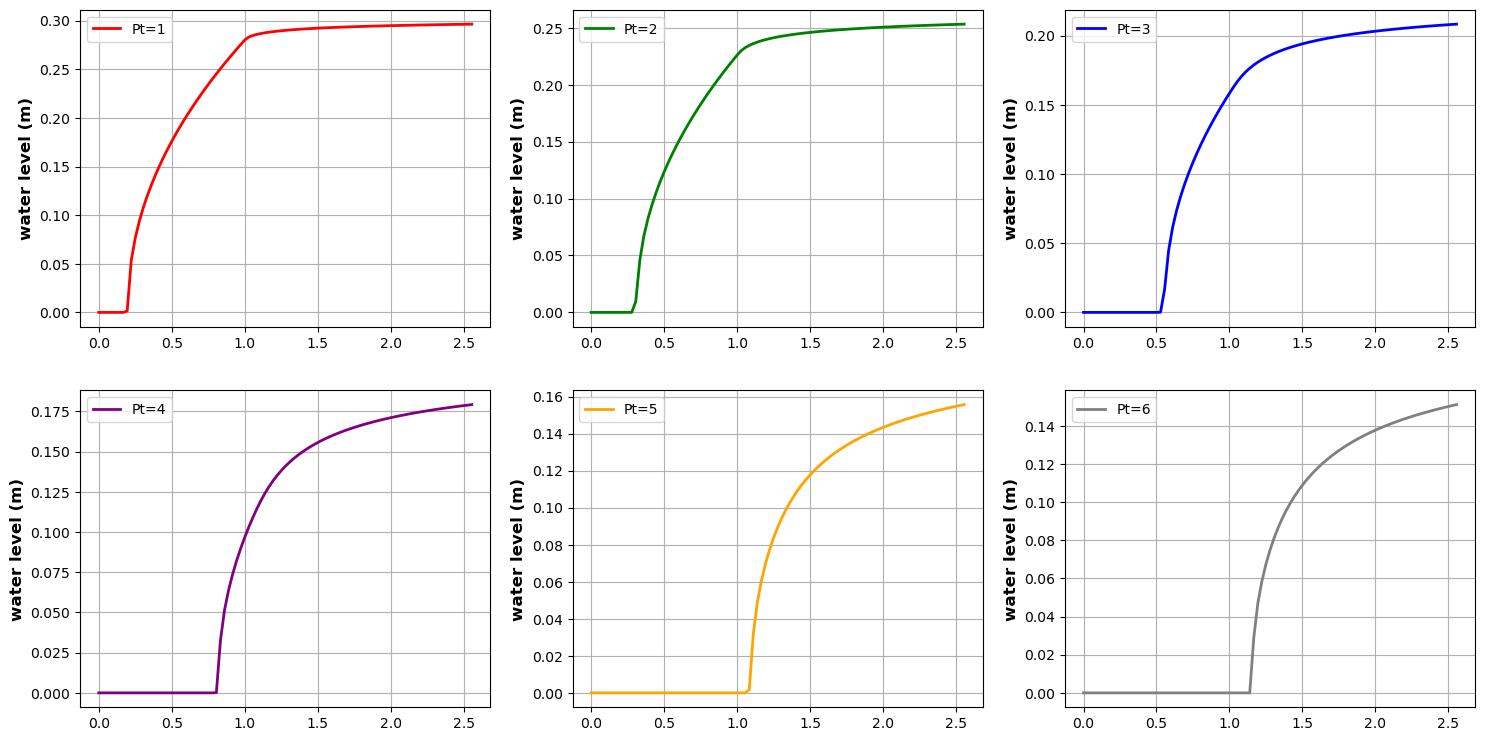

In [39]:
# write a function taht reads all the gauge data and plot them into 16 subplots
import matplotlib.pyplot as plt
def plot_gauge():
    #  look for all gauge files
    gauge_files = glob.glob('gauge*.txt')
    #  sort the files
    gauge_files.sort()
    figsize(18, 14)
    colours = ['red', 'green', 'blue', 'purple', 'orange', 'gray']
    for gauge in range(len(gauge_files)):
        time, h,eta, topo = read_gauge_data(gauge_files[gauge])
        # plot the data
        subplot(3,3,gauge+1)
        plot(time/3600,eta,color=colours[gauge],label=f'Pt={gauge+1}',linewidth=2)
        
        # if gauge < 12:
        #     xticks([])  
        # add a legend
        # xlim(0,400)
        ylabel('water level (m)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
        grid()
        legend(loc='best')
plot_gauge()

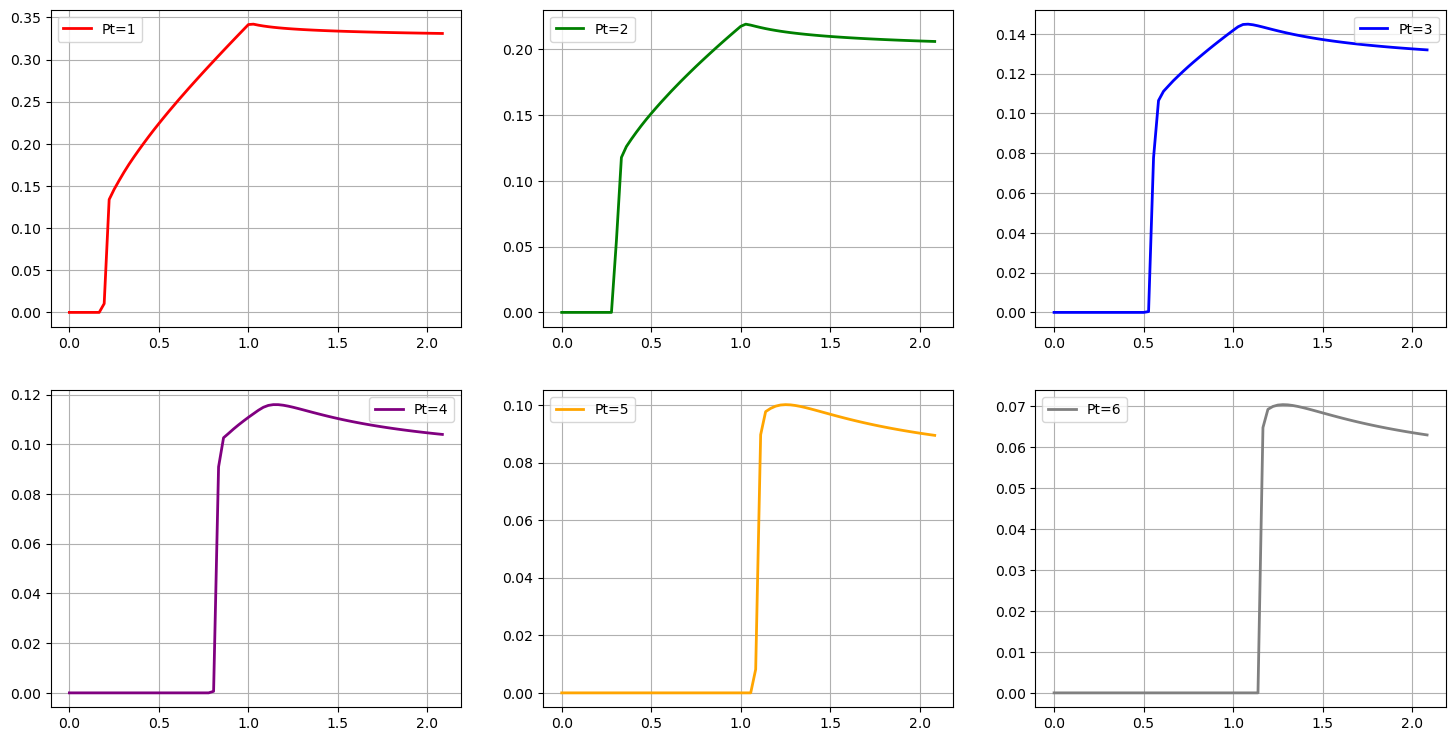

In [38]:
import matplotlib.pyplot as plt
def plot_gauge():
    #  look for all gauge files
    gauge_files = glob.glob('gauge*.txt')
    #  sort the files
    gauge_files.sort()
    figsize(18, 14)
    colours = ['red', 'green', 'blue', 'purple', 'orange', 'gray']
    for gauge in range(len(gauge_files)):
        time, h,eta, u = read_gauge_data(gauge_files[gauge])
        # plot the data
        subplot(3,3,gauge+1)
        plot(time/3600,u,color=colours[gauge],label=f'Pt={gauge+1}',linewidth=2)
        
        # if gauge < 12:
        #     xticks([])  
        # add a legend
        # xlim(0,400)
        grid()
        legend(loc='best')
plot_gauge()